In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

# 7. The SARIMA Model

### SARIMA on Walmart Sales

In [3]:
# Import the dataframe

url1 = ('https://raw.githubusercontent.com/abhinav-bhardwaj/Walmart-Sales-Time-Series-Forecasting-Using-Machine-Learning/refs/heads/master/datasets/train.csv')

data = pd.read_csv(url1)

data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
data = data.groupby('Date').sum()

data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0
2010-02-12,65082,131179,48336677.63,2956
2010-02-19,65610,131897,48276993.78,0
2010-02-26,65045,130161,43968571.13,0
2010-03-05,64897,129670,46871470.30,0


In [5]:
# Convert index to datetime if not already
data.index = pd.to_datetime(data.index)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Dept          143 non-null    int64  
 2   Weekly_Sales  143 non-null    float64
 3   IsHoliday     143 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 5.6 KB


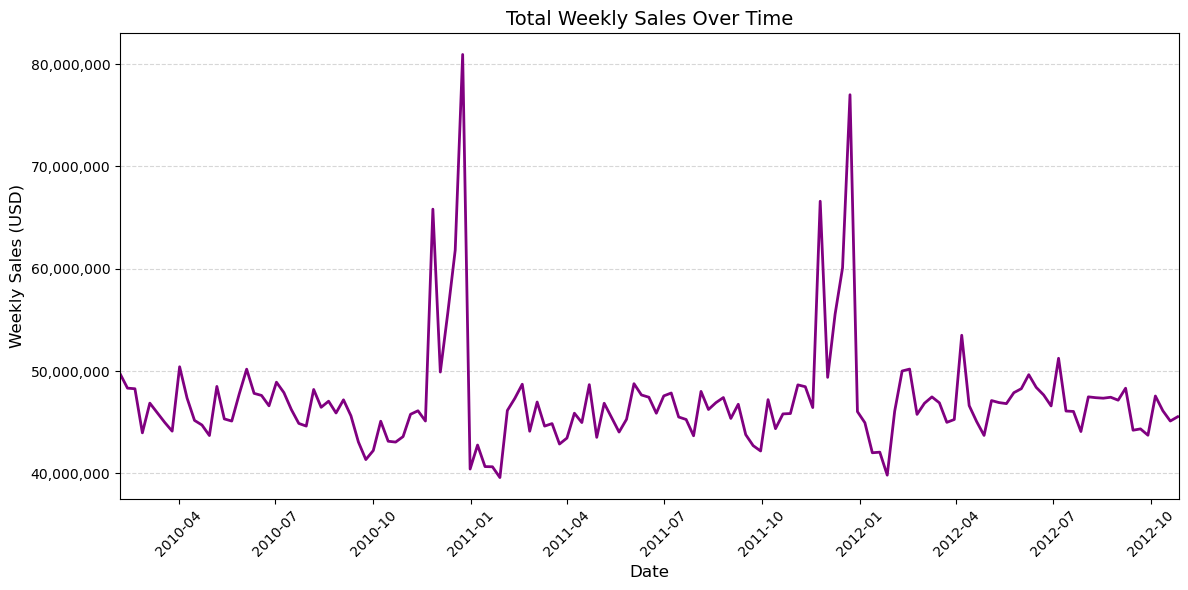

In [6]:
import matplotlib.ticker as ticker


# Plot the weekly sales
fig, ax = plt.subplots(figsize=(12, 6))                             
ax.plot(data['Weekly_Sales'], color='purple', linewidth=2)             

# Labels and title
ax.set_title('Total Weekly Sales Over Time', fontsize=14)            
ax.set_ylabel('Weekly Sales (USD)', fontsize=12)                     
ax.set_xlabel('Date', fontsize=12)                                   

# Remove scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlim(pd.to_datetime('2010-02-05'), pd.to_datetime('2012-10-27'))

# Improve grid and date layout
ax.grid(axis='y', linestyle='--', alpha=0.5)                         
plt.xticks(rotation=45)                                               
plt.tight_layout()                                                    
plt.show();

In [7]:
import random
import statsmodels.api as sm
from sklearn.metrics import r2_score

random.seed(12345)

train = data['Weekly_Sales'][:-10]
test = data['Weekly_Sales'][-10:]

mod = sm.tsa.statespace.SARIMAX(train, 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,52))
res = mod.fit(disp=False)
fcst = res.forecast(steps=10)

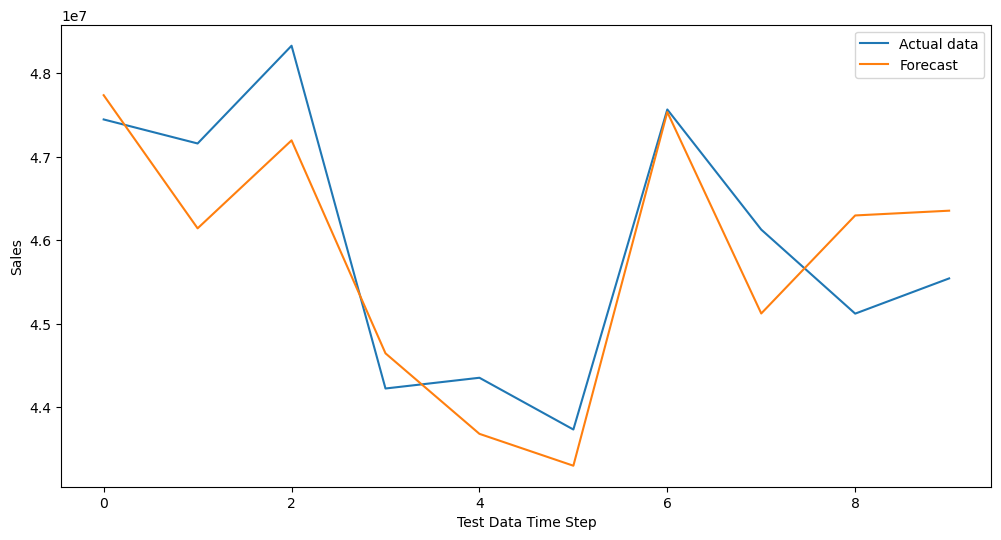

In [8]:
plt.figure(figsize=(12, 6))  
plt.plot(list(test))
plt.plot(list(fcst))
plt.legend(['Actual data', 'Forecast'])
plt.ylabel('Sales')
plt.xlabel('Test Data Time Step')
plt.show(); 

In [9]:
round(r2_score(test, fcst), 4)

0.731

In [10]:
scores = []
for p in range(2):
    for i in range(2):
        for q in range(2):
            for P in range(2):
                for D in range(2):
                    for Q in range(2):

                        try:
                            mod = sm.tsa.statespace.SARIMAX(train, order=(p,0,q), seasonal_order=(P,D,Q,52))
                            res = mod.fit(disp=False)
                            
                            score = [p,i,q,P,D,Q,r2_score(test, res.forecast(steps=10))]
                            #print(score)
                            scores.append(score)
                            
                            del mod
                            del res
                            
                        except:
                            print('errored')

res = pd.DataFrame(scores)
res.columns = ['p', 'i', 'q', 'P', 'D', 'Q', 'score']
res.sort_values('score')

,p,i,q,P,D,Q,score
0,0,0,0,0,0,0,-907.106611
16,0,1,0,0,0,0,-907.106611
8,0,0,1,0,0,0,-833.391983
24,0,1,1,0,0,0,-833.391983
25,0,1,1,0,0,1,-507.008921
...,...,...,...,...,...,...,...
7,0,0,0,1,1,1,0.609138
45,1,0,1,1,0,1,0.704996
61,1,1,1,1,0,1,0.704996
44,1,0,1,1,0,0,0.710287


In [11]:
# Best model
best_model = res[res['score'] == res['score'].max()]

print("Best model:")
print(best_model)

Best model:
    p  i  q  P  D  Q     score
44  1  0  1  1  0  0  0.710287
60  1  1  1  1  0  0  0.710287


# 8. The SARIMAX Model

In [12]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0
2010-02-12,65082,131179,48336677.63,2956
2010-02-19,65610,131897,48276993.78,0
2010-02-26,65045,130161,43968571.13,0
2010-03-05,64897,129670,46871470.30,0


In [13]:
data['IsHoliday'] = data['IsHoliday'] > 0
data['IsHoliday'] = data['IsHoliday'].apply(lambda x: float(x))

data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0.0
2010-02-12,65082,131179,48336677.63,1.0
2010-02-19,65610,131897,48276993.78,0.0
2010-02-26,65045,130161,43968571.13,0.0
2010-03-05,64897,129670,46871470.30,0.0


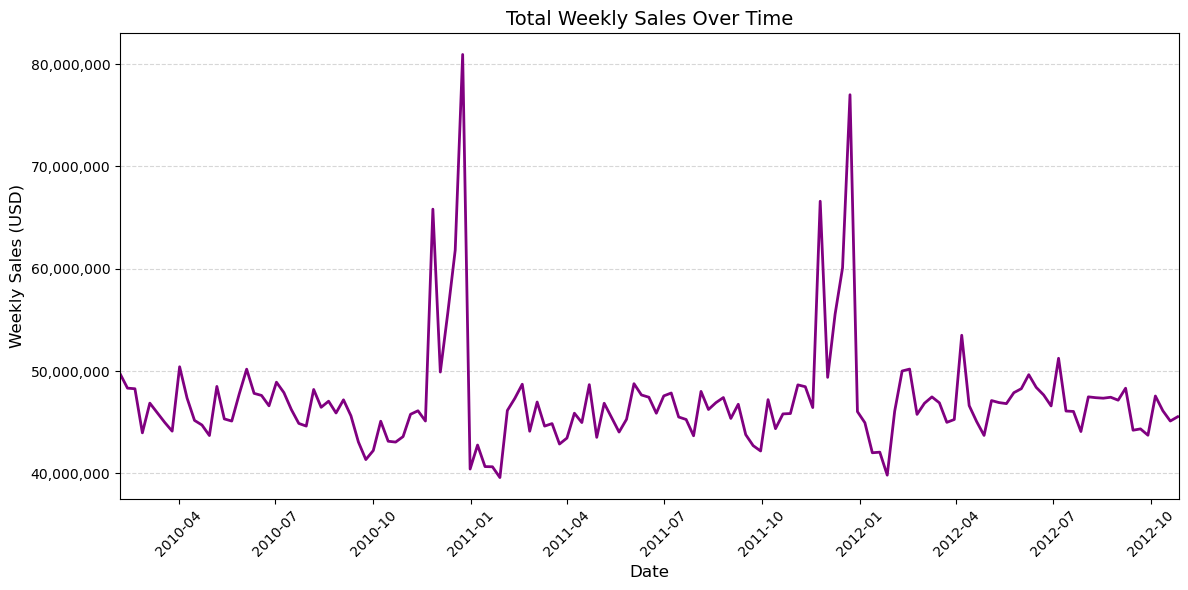

In [14]:
# Plot the weekly sales
fig, ax = plt.subplots(figsize=(12, 6))                             
ax.plot(data['Weekly_Sales'], color='purple', linewidth=2)             

# Labels and title
ax.set_title('Total Weekly Sales Over Time', fontsize=14)            
ax.set_ylabel('Weekly Sales (USD)', fontsize=12)                     
ax.set_xlabel('Date', fontsize=12)                                   

# Remove scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlim(pd.to_datetime('2010-02-05'), pd.to_datetime('2012-10-27'))

# Improve grid and date layout
ax.grid(axis='y', linestyle='--', alpha=0.5)                         
plt.xticks(rotation=45)                                               
plt.tight_layout()                                                    
plt.show();

In [15]:
data[['Weekly_Sales', 'IsHoliday']].corr()

,Weekly_Sales,IsHoliday
Weekly_Sales,1.000000,0.172683
IsHoliday,0.172683,1.000000


In [16]:
import random
import statsmodels.api as sm
from sklearn.metrics import r2_score


random.seed(12345)

train = data['Weekly_Sales'][:-10]
test = data['Weekly_Sales'][-10:]

mod = sm.tsa.statespace.SARIMAX(
    endog=data['Weekly_Sales'][:-10],
    exog=data['IsHoliday'][:-10],
    order=(0,1,1),
    seasonal_order=(1,1,1,52),
)
res = mod.fit(disp=False)
fcst = res.forecast(steps=10, exog = data['IsHoliday'][-10:])

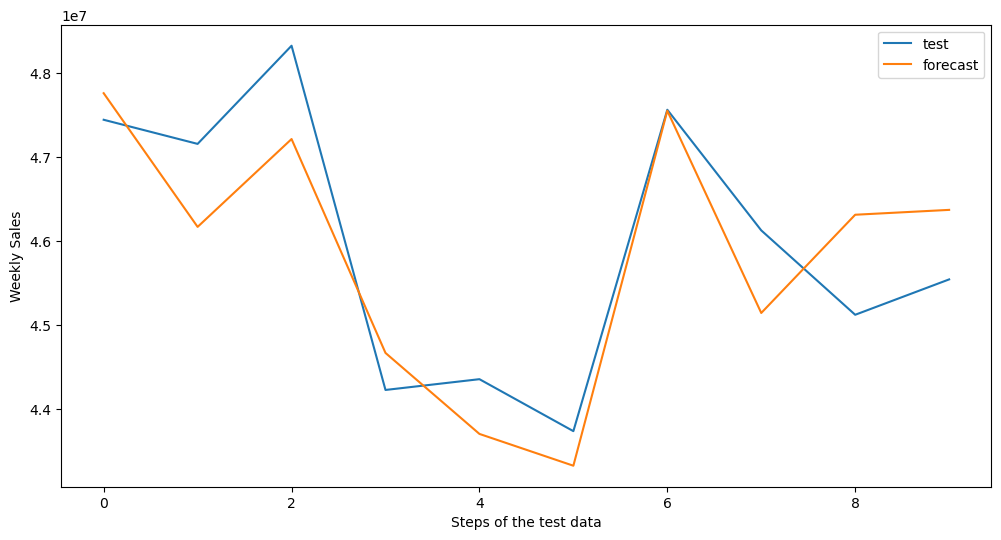

In [17]:
plt.figure(figsize=(12, 6))  
plt.plot(list(test))
plt.plot(list(fcst))
plt.xlabel('Steps of the test data')
plt.ylabel('Weekly Sales')
plt.legend(['test', 'forecast'])
plt.show()

In [18]:
round(r2_score(test, fcst), 4)

0.7343